# Why Carpet Plots?
A typical scatter plot allows you to compare the impact of one independent variable (*x-axis*) on one dependent variable (*y-axis*). Carpet plots facilitate trade studies between more than one independent variable.

## Example Data
Imagine you need to deliver a number of items and want to know how much gas for the trip will cost. Total fuel cost is a function of the number of stops on the route. Let's import the required libraries and generate an example dataset. 

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly

In [2]:
# Generate data with one independent variable (stops)
stops = np.arange(1, 11, 1)
dist = 5
cost = stops * dist * 3 / 30 # $3.00/gal and 30 mpg
cost

array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ])

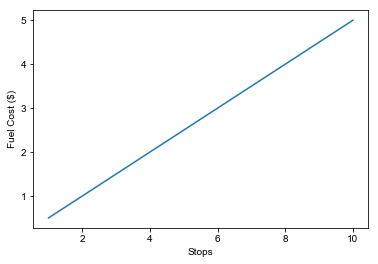

In [3]:
plt.plot(stops,cost)
plt.xlabel('Stops')
plt.ylabel('Fuel Cost ($)')
plt.style.use('seaborn-ticks')

Now let's say we want to determine the total fuel cost as a function of two independent variables: (1) the number of stops on the route, and (2) the average distance between stops. For a range of numbers of stops and distances between stops, we can calculate each respective total fuel cost.

In [4]:
# Generate data with two independent variables (stops, distance)
stops = np.arange(1, 11, 1)
dist = np.arange(10, 41, 5)
stops, dist = np.meshgrid(stops, dist)
cost = (stops * dist * 3 / 30)
cost.shape

(7, 10)

We have a few options to illustrate the relationship of these two independent variables: 

## Multiple Line Plots
First we can plot multiple lines, each representing one value of the second independent variable. For a simple dataset this might work, but it is difficult to visualize the trade-space in this manner especially with more complex datasets.

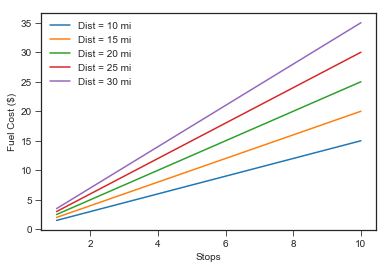

In [5]:
for i in [0,1,2,3,4]:
    plt.plot(stops[i:][1],cost[i:][1], label='Dist = {} mi'.format(dist[:,0][i]))
plt.xlabel('Stops')
plt.ylabel('Fuel Cost ($)')
handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles, labels)
plt.style.use('seaborn-ticks')

We could also separate each of these lines into separate [subplots](https://matplotlib.org/examples/pylab_examples/subplots_demo.html), but there again we find difficulty making quick comparisons between each independent variable. 

## 3D Surface Plot
We can get fancy and generate a 3D surface plot of our data. While pretty, this is even more difficult to read in a useful way if we are trading the two independent variables in an effort to converge on the dependent variable. At 17 stops and 24 miles between stops, how much will fuel cost? It's not easy to determine from this plot.

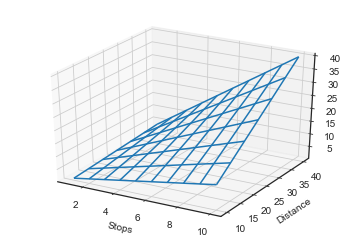

In [6]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plt.xlabel('Stops')
plt.ylabel('Distance')
ax.plot_wireframe(stops, dist, cost, rstride=1, cstride=1)

# Enter the Carpet Plot
The advantage of carpet plots is the ability to quickly visualize the relative impact of the two independent variables. This can be especially helpful when doing a trade study where multiple variables are in play.

## Data preparation using `pd.melt()`
Pandas has a number of helpful data reshaping methods, and this exercise presents the opportunity to use [`pd.melt()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html). 

Our starting dataset is an array with the index of one axis representing the first independent variable values (**`stops`**), and the index of the other axis representing the second independent variable values (**`dist`**). The values in the array represent our dependent variable (**`cost`**). You can think of this as the output of an Excel data table, which may at times in fact be the data source. 

Plotly takes a list of each variable to plot a carpet plot, so we use `pd.melt()` to [tidy](http://www.stat.wvu.edu/~jharner/courses/stat623/docs/tidy-dataJSS.pdf) this data and then convert to lists.

In [7]:
stops = (pd.DataFrame(stops)
         .melt()
         ['value']
         .tolist())
dist = (pd.DataFrame(dist)
         .melt()
         ['value']
         .tolist())
cost = (pd.DataFrame(cost)
         .melt()
         ['value']
         .tolist())

### Plotting with Plotly
Now that we have a tidy dataset in a list for each variable, we can plot using Plotly. Why Plotly? I have avoided Plotly in the past due to the confusing process of making an account and putting your plots online. But using Plotly's [carpet plot example](https://plot.ly/python/carpet-plot/) and some information from Stackoverflow, I was able to get it to work without the online authentication, which is just fine for a static chart. I would still prefer to use matplotlib, and may tackle that later. For now, here's the code to generate the Plotly carpet plot. Note that when running this, Plotly will generate a HTML file which then presents a prompt to save a .jpeg of your chart. 

In [8]:
import plotly.graph_objs as go
from plotly.graph_objs import Layout,Scatter

trace1 = go.Carpet(
    a = stops,
    b = dist,
    y = cost,
    aaxis = dict(
        tickprefix = '',
        ticksuffix = ' stops',
        smoothing = 1,
        minorgridcount = 9
    ),
    baxis = dict(
        tickprefix = 'Dist = ',
        ticksuffix = ' mi.',
        smoothing = 1,
        minorgridcount = 9
    )
)

plotly.offline.plot({
    "data": [trace1], 
    "layout": Layout(title="Carpet Plot Example",
                     font=dict(family='Arial, sans-serif', 
                               size=18, 
                               color='rgb(0,0,0)'),
                     yaxis=dict(
                         title='Total Fuel Cost ($)',
                         titlefont=dict(
                             family='Arial, sans-serif',
                             size=18
                         ),
                         showticklabels=True
                     ),
                     margin=go.Margin(
                         l=100,
                         r=50)
                    )
},filename='Carpet.html',image='jpeg')

'file:///Users/matthewkudija/Documents/GitHub/blog/content/downloads/notebooks/CarpetPlots/Carpet.html'

<img src="../../../images/Carpet.jpeg">

Great, a carpet plot! Now we can pick any combination of number of stops and distance between stops and easily determine the total fuel cost for the trip. 

# Future Work
This has been a brief overview of plotting 3-variable carpet plots in Python with Plotly. In the future, I would also like to:
- plot with matplotlib, perhaps starting with [this example](https://github.com/steve855/pyCarpetPlot/blob/master/pyCarpetPlot.py
)
- demonstrate including more than two independent variables

In [9]:
%load_ext watermark
%watermark -iv

matplotlib  2.1.0
pandas      0.21.1
numpy       1.13.3
plotly      2.2.2



*This post was written entirely in the Jupyter notebook. You can [download](https://github.com/mkudija/blog/blob/master/content/downloads/notebooks/CarpetPlots/CarpetPlots.ipynb) the original notebook.*

# Unused Extras

In [10]:
df = pd.read_excel('CarpetPlotData.xlsx')
df.head()

,x,5,10,15,20,25,30
0,1,0.5,1,1.5,2,2.5,3
1,2,1.0,2,3.0,4,5.0,6
2,3,1.5,3,4.5,6,7.5,9
3,4,2.0,4,6.0,8,10.0,12
4,5,2.5,5,7.5,10,12.5,15


### Plotting with Plotly
Now that we have a tidy dataset, we can plot using Plotly. Why Plotly? I have avoided Plotly in the past beacuse of the weird partially-open-source-partially-paid model and needing to authenticate online. Using Plotly's [carpet plot example](https://plot.ly/python/carpet-plot/) and some digging on Stackoverflow, I was able to get it to work without the online authentication. I would still prefer to use matplotlib, and may tackle that later. For now, here's the code to generate the Plotly carpet plot:

In [11]:
# # RESOURCES:
# # carpet plots: https://en.wikipedia.org/wiki/Carpet_plot
# # good plotly offline examples: https://github.com/SayaliSonawane/Plotly_Offline_Python/blob/master/Line%20Chart/line_chart.py
# # other python for carpet plots: https://github.com/steve855/pyCarpetPlot/blob/master/pyCarpetPlot.py

# import plotly.graph_objs as go
# from plotly.graph_objs import Layout,Scatter

# trace1 = go.Carpet(
#     a = df.a.tolist(),
#     b = df.b.tolist(),
#     y = df.y.tolist(),
#     aaxis = dict(
#         tickprefix = '',
#         ticksuffix = ' stops',
#         smoothing = 1,
#         minorgridcount = 9
#     ),
#     baxis = dict(
#         tickprefix = 'Dist = ',
#         ticksuffix = ' mi.',
#         smoothing = 1,
#         minorgridcount = 9
#     )
# )

# plotly.offline.plot({
#     "data": [trace1], 
#     "layout": Layout(title="Carpet Plot Example",
#                      font=dict(family='Arial, sans-serif', 
#                                size=18, 
#                                color='rgb(0,0,0)'),
#                      yaxis=dict(
#                          title='Total Trip Cost ($)',
#                          titlefont=dict(
#                              family='Arial, sans-serif',
#                              size=18
#                          ),
#                          showticklabels=True
#                      ),
#                      margin=go.Margin(
#                          l=100,
#                          r=50)
#                     )
# },filename='Carpet.html',image='jpeg')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

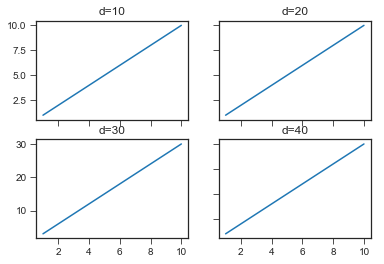

In [12]:
# subplots
# Four axes, returned as a 2-d array

x = [1, 10]
y1 = [1.0,10.0]
y2 = [2.0, 20.0]
y3 = [3.0, 30.0]
y4 = [4.0, 40.0]
f, axarr = plt.subplots(2, 2)
axarr[0, 0].plot(x, y1)
axarr[0, 0].set_title('d=10')
axarr[0, 1].plot(x, y2)
axarr[0, 1].set_title('d=20')
axarr[1, 0].plot(x, y3)
axarr[1, 0].set_title('d=30')
axarr[1, 1].plot(x, y4)
axarr[1, 1].set_title('d=40')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)


In [13]:
print(plt.style.available)

['_classic_test', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'mag']


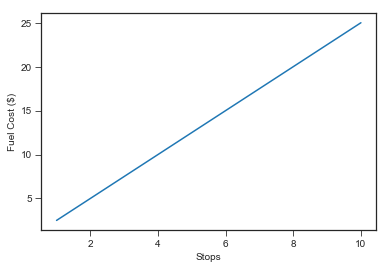

In [14]:
data = {'Stops': [1, 5, 10],
      'FuelCost': [2.5, 12.5, 25.0]}
df = pd.DataFrame.from_dict(data)

df.set_index('Stops')['FuelCost'].plot()
plt.ylabel('Fuel Cost ($)')
plt.style.use('seaborn-ticks')

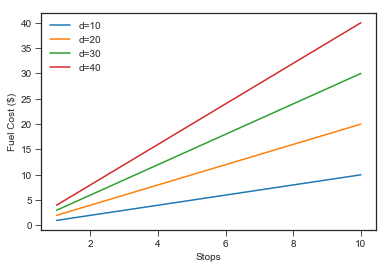

In [15]:
data = {'Stops': [1, 10],
        'd=10': [1.0, 10.0],
        'd=20': [2.0, 20.0],
        'd=30': [3.0, 30.0],
        'd=40': [4.0, 40.0]}
df = pd.DataFrame.from_dict(data)

(df
 .set_index('Stops')[['d=10','d=20','d=30','d=40']]
 .plot()
)
plt.ylabel('Fuel Cost ($)')
plt.show()

Text(0.5,0,'Distance')

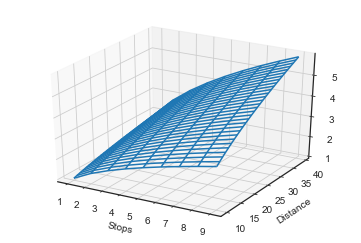

In [16]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X = np.arange(1, 10, 1)
Y = np.arange(10, 40, 1)
X, Y = np.meshgrid(X, Y)
Z = np.sqrt(X * Y * 3 / 30)

ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1)
plt.xlabel('Stops')
plt.ylabel('Distance')

Text(0.5,0,'Distance')

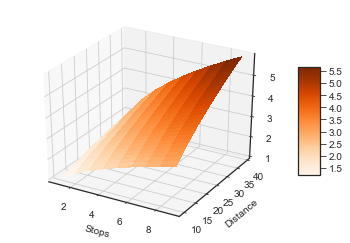

In [17]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X = np.arange(1, 10, 1)
Y = np.arange(10, 40, 1)
X, Y = np.meshgrid(X, Y)
Z = np.sqrt(X * Y * 3 / 30)

surf = ax.plot_surface(X, Y, Z, cmap=cm.Oranges,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.xlabel('Stops')
plt.ylabel('Distance')

In [18]:
%load_ext watermark
%watermark -iv

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
matplotlib  2.1.0
pandas      0.21.1
numpy       1.13.3
plotly      2.2.2



*This post was written entirely in the Jupyter notebook. You can [download](https://github.com/mkudija/blog/blob/master/content/downloads/notebooks/CarpetPlots/CarpetPlots.ipynb) the original notebook.*